## Введение в машинное обучение: линейная регрессия

Загрузка исходных данных

In [2]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

features = boston_dataset.data
y = boston_dataset.target
print('Фичи')
print(features)
print('\nЦелевая переменная y')
print(y[:10])


# текстовое описание датасета
# print('\n',boston_dataset.DESCR)

Фичи
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]

Целевая переменная y
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


## Задание 1

Реализуйте формулу матричного умножения для вычисления коэффициентов линейной регрессии на языке python 

Нужно написать код для аналитического вычисления коэффициентов линейной регрессии по формуле $\overline{w} = \left(X^TX\right)^{-1}X^T\overline{y}$

In [3]:
from numpy.linalg import inv, norm
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
# вычисляем к-ты линейной регрессии
n = features.shape[1]+1
X_train, X_test, Y_train, Y_test = train_test_split(features, y, test_size = 0.2, random_state=42)
w_analytic = np.zeros(features.shape[1])
#-------- ВАШ КОД ТУТ -------------------
H = np.ones((X_train.shape[0],n))
H[:,1:n] = X_train
HT = H.transpose()
Y = Y_train.reshape(-1, 1)
w_analytic = np.dot(inv(np.dot(HT,H)),np.dot(HT,Y)).transpose().reshape(n)

reg = LinearRegression().fit(X_train, Y_train)
all_reg_coef = np.zeros(n)
all_reg_coef[0] = reg.intercept_
all_reg_coef[1:n] = reg.coef_
print(f"Коэффициенты, вычисленные моделью sklearn {all_reg_coef}")






#----------------------------------------

print(f'Аналитически определённые коэффициенты {w_analytic}')

Коэффициенты, вычисленные моделью sklearn [ 3.02467510e+01 -1.13055924e-01  3.01104641e-02  4.03807204e-02
  2.78443820e+00 -1.72026334e+01  4.43883520e+00 -6.29636221e-03
 -1.44786537e+00  2.62429736e-01 -1.06467863e-02 -9.15456240e-01
  1.23513347e-02 -5.08571424e-01]
Аналитически определённые коэффициенты [ 3.02467510e+01 -1.13055924e-01  3.01104641e-02  4.03807204e-02
  2.78443820e+00 -1.72026334e+01  4.43883520e+00 -6.29636221e-03
 -1.44786537e+00  2.62429736e-01 -1.06467863e-02 -9.15456240e-01
  1.23513347e-02 -5.08571424e-01]


## Задание 2

Визуализируйте в виде "столбиков" коэффициенты "из коробки" (т.е. из sklearn) и полученные аналитически на одном графике. Для наглядности используйте различную "прозрачность" столбиков

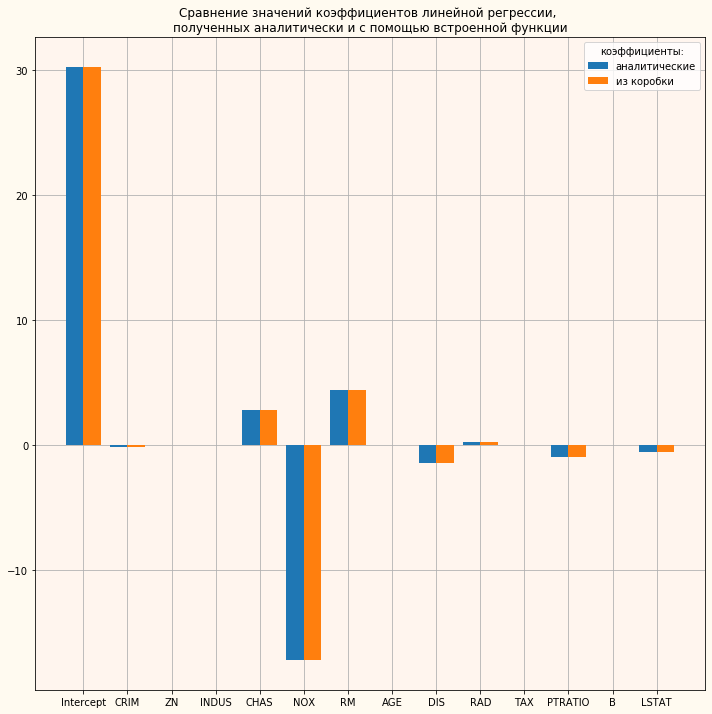

In [5]:
%matplotlib inline

#-------- ВАШ КОД ТУТ -------------------
from matplotlib import pyplot as plt
n = 15
x1 = np.arange(1, n) - 0.2
x2 = np.arange(1, n) + 0.2

data_names = ['Intercept', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

y1 = w_analytic
y2 = all_reg_coef

fig, ax = plt.subplots()
ax.set_title('Сравнение значений коэффициентов линейной регрессии, \nполученных аналитически и с помощью встроенной функции')
ax.bar(x1, y1, width = 0.4, label = 'аналитические', zorder = 2)
ax.bar(x2, y2, width = 0.4, label = 'из коробки', zorder = 2)

ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(12)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.xticks(range(1,len(data_names)+1), data_names)
plt.grid()
plt.legend(loc='upper right', title='коэффициенты:')
plt.show()



#----------------------------------------

## Задание 3

Постройте предсказания двумя моделями

* вашей моделью
* моделью из библиотеки sklearn

Посчитайте, какую ошибку $(\hat{y}-y)^2$ даёт модели на каждом обучающем примере каждая из моделей и постройте две гистограммы на одном графике

Если вы всё сделали правильно, гистограммы ошибок должны совпасть

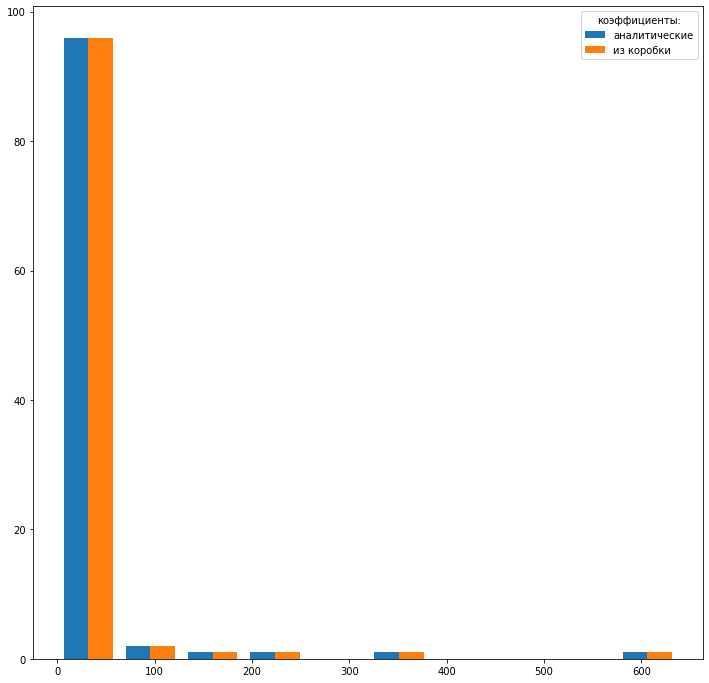

In [6]:
#-------- ВАШ КОД ТУТ -------------------
m = X_test.shape[0]
n = X_test.shape[1]+1
H_test = np.ones((X_test.shape[0],n))
H_test[:,1:n] = X_test
y_pred = np.dot(w_analytic.reshape(1,-1),H_test.transpose()).reshape(m)
y_pred_library = reg.predict(X_test)
error_analytic = (Y_test-y_pred)**2
error_function = (Y_test-y_pred_library)**2

fig, axs = plt.subplots()
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(12)    #  высота Figure
axs.hist([error_analytic,error_function], label=['аналитические','из коробки'])
ax.set_title('Сравнение ошибок регрессионных моделей \nс коэффициентами, полученными аналитически и с помощью встроенной функции')
plt.legend(loc='upper right', title='коэффициенты:')
plt.show()




#----------------------------------------